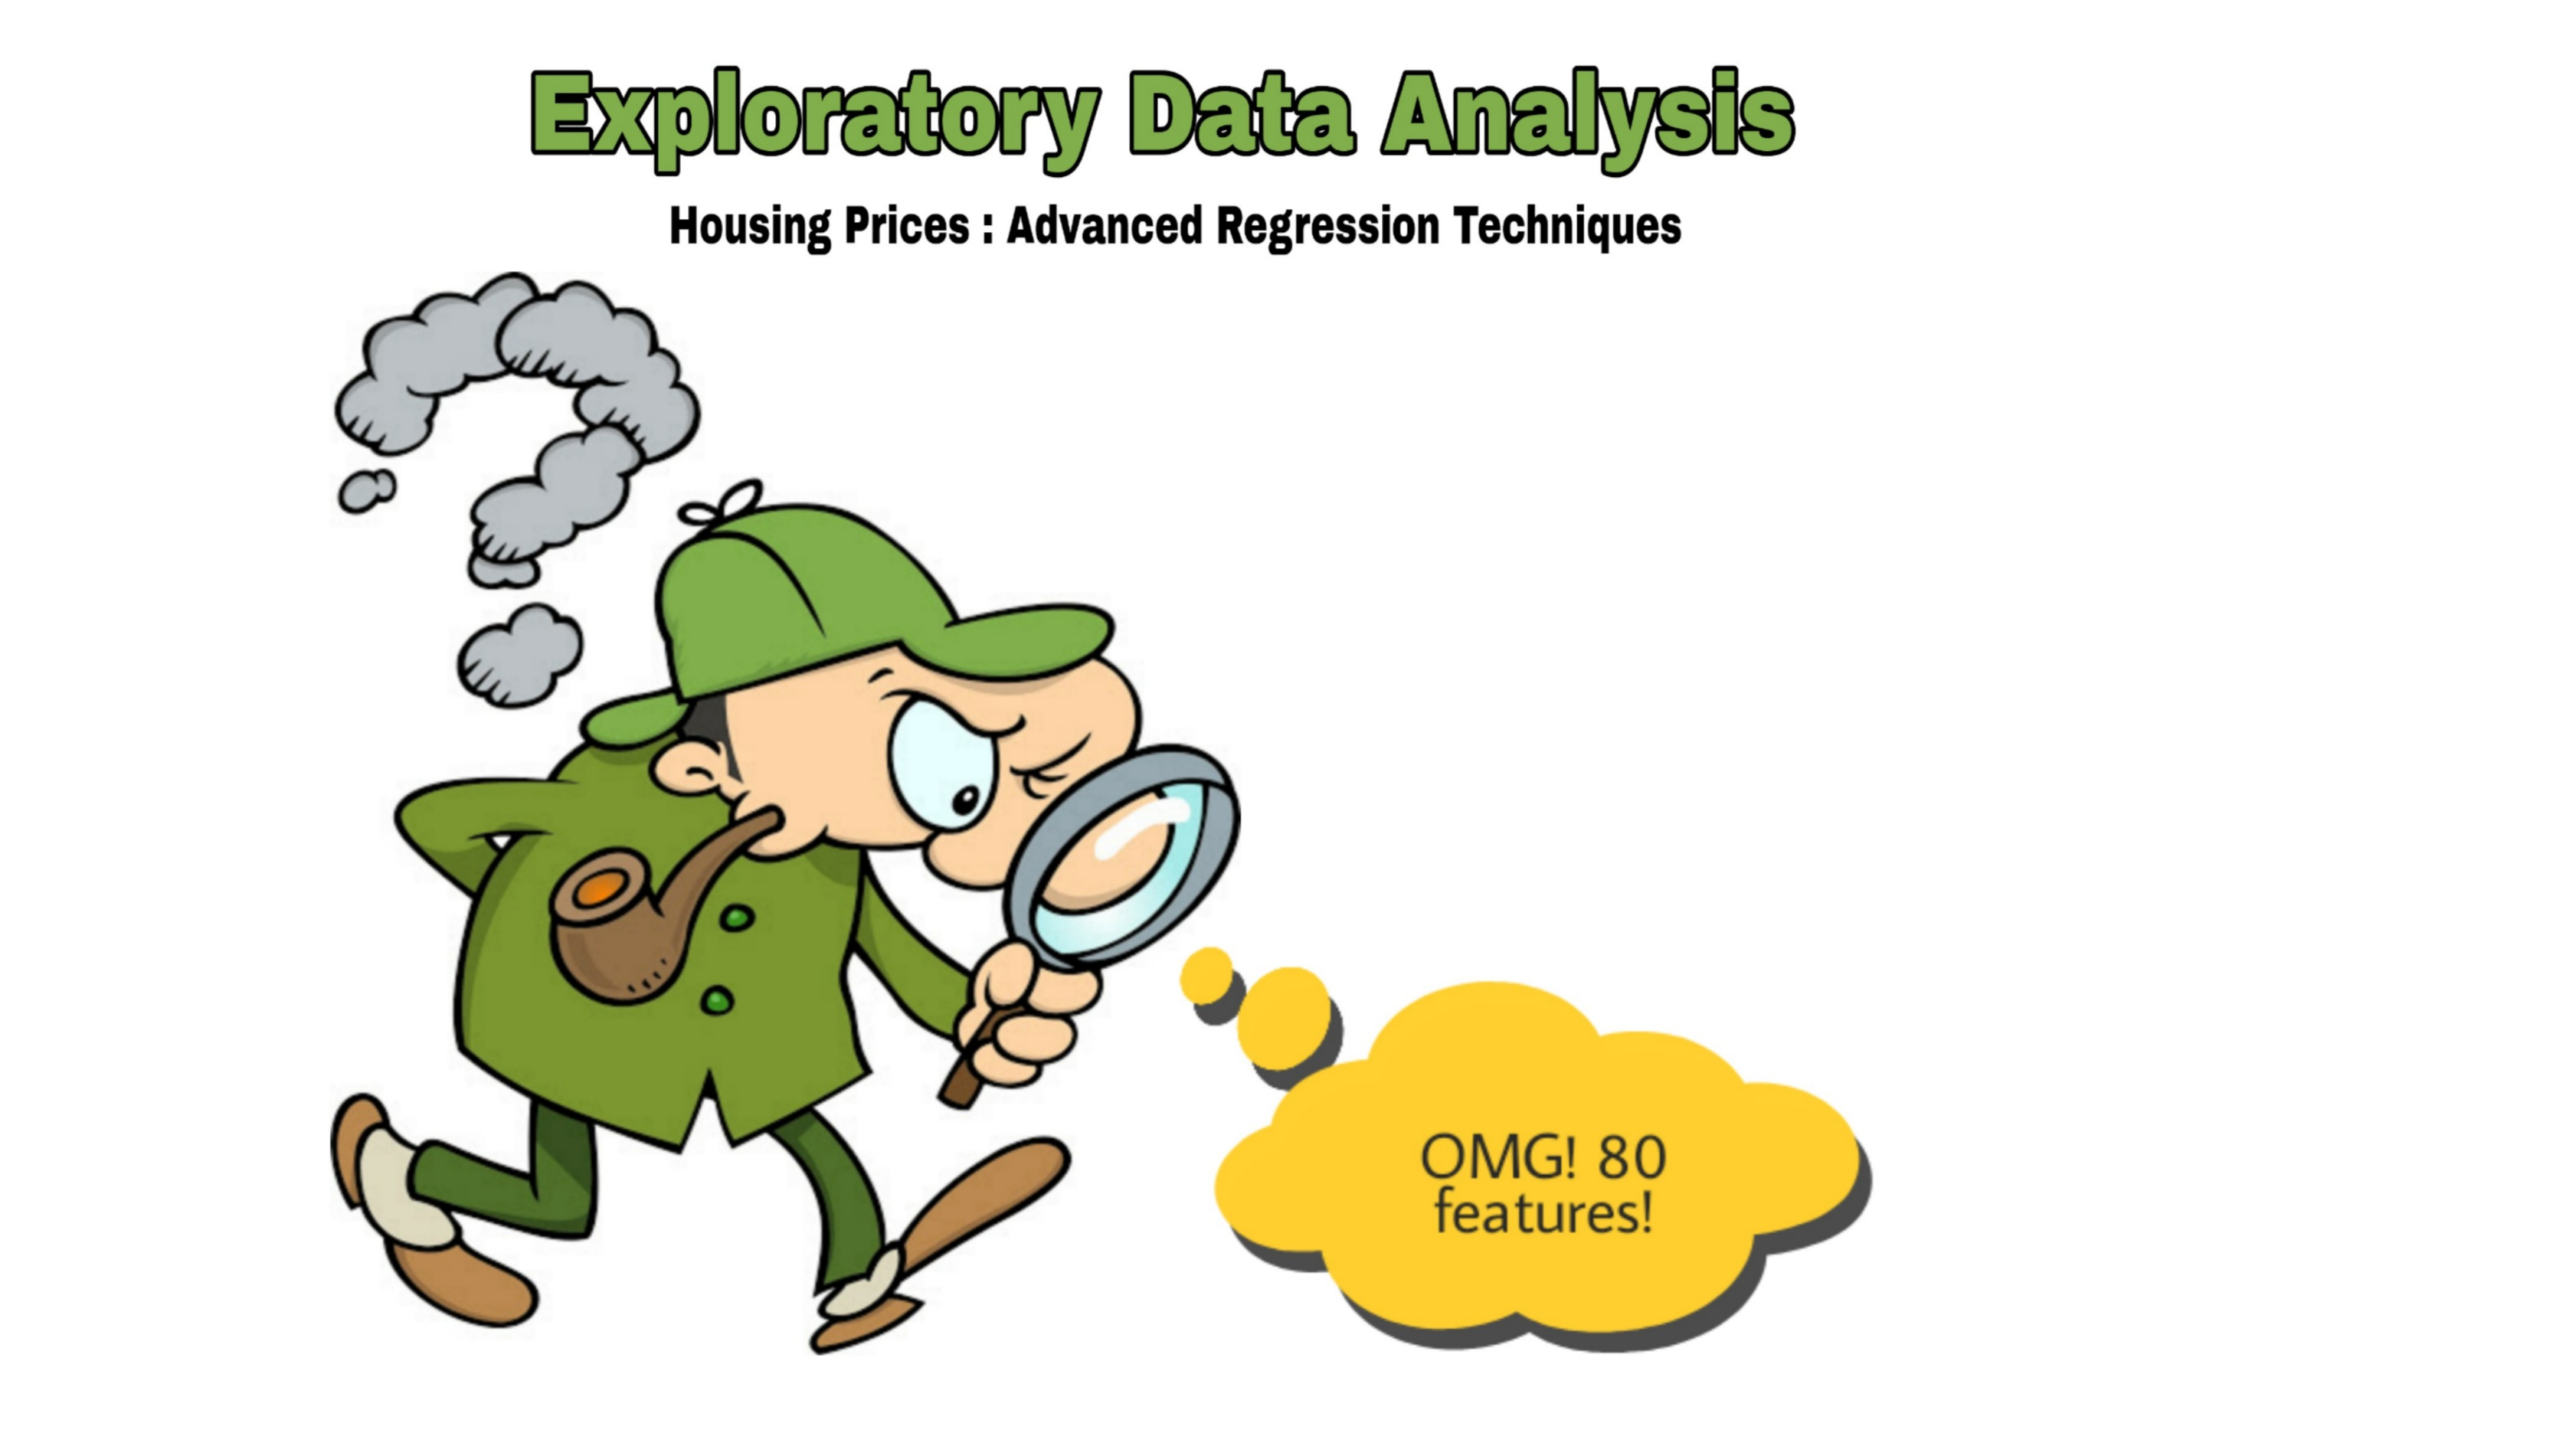

<br/>
<br/>

## **Table of contents**  
1. Importing necessary modules along with dataset
2. Reconnaissance of the dataset (Head, Shape, Datatypes)  
3. Checking the missing values  
4. Correlation of the features with the response variable (SalePrice)  
5. Features in a detailed manner  
        5.1 Numerical Features  
            5.1.1 Year related Features  
            5.1.2 Descrete Features  
            5.1.3 Continuous Features  
        5.2 Categorical Features  
6. 
    

<br/>
<br/>

## 1. Importing necessary modules

In [2]:
import pandas as pd               #Data Manipulation
import numpy as np                #Linear Algebra
import matplotlib.pyplot as plt   #Visualization
%matplotlib inline                #Showing the plots in Jupyter Notebook
import seaborn as sns             #Visualization

<br/>

In [16]:
# Load the dataset
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/Competitions/kaggle/House Prices Advanced Regression/train.csv')

# When a dataset has a large amount features, the features located in the middle can't be seen in notebook.
# They are indicated by some dots.
# But if all the features need to be seen, this one line of code will be there to help you out. 
pd.pandas.set_option('display.max_columns', None)

<br/>
<br/>

## 2. Reconnaissance of the dataset 

In [4]:
# Head : 1st few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<br/>

In [95]:
# Shape of the dataset
df.shape

(1460, 81)

<br/>

In [98]:
# Data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<br/>
<br/>

## 3. Checking the missing values
...[0:25] - We have observed 25 features in descending order and in the bottom of the list got some features with 0 missing values. That means there's also no missing values in the features from 26 to the rest. 

In [15]:
df.isnull().sum().sort_values(ascending = False)[0:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

<br/>

### Observing Missing values with Heatmap

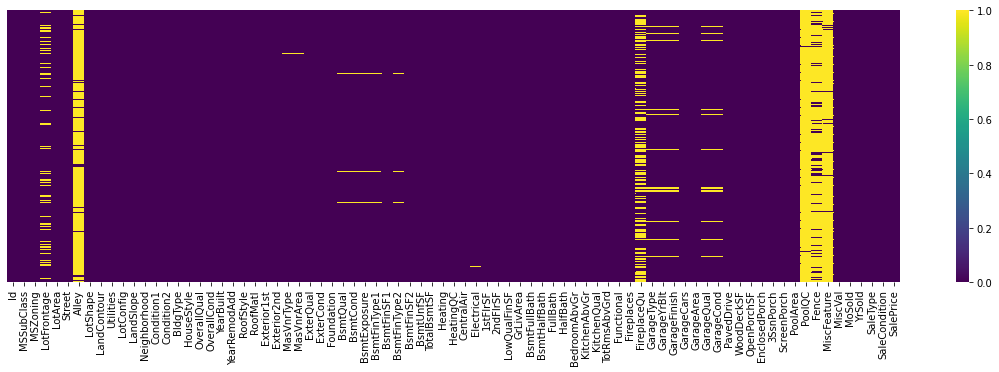

In [31]:
plt.figure(figsize= (20, 5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')
plt.show()

<br/>
<br/>

## 4. Correlation of the features with the response variable (SalePrice)
df.columns[1:] - We removed the column 'Id' as it hasn't any importance here.

In [26]:
df[df.columns[1:]].corr()['SalePrice'][:]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

<br/>
<br/>

## 5. Features in a detailed manner
<br/>

### 5.1. Numerical Features

In [5]:
# We have craeted a list with all the features which data types aren't 'Object'
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Number of numerical features
print('Number of numerical features : {}'.format(len(numerical_features)))

# List of numerical features
numerical_features

Number of numerical features : 38


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [34]:
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


<br/>
<br/>

### 5.1.1. Year related Features
From the first few rows of the numerical features, we are seeing that there are about 4 features which are year related. We don't need all of them. All we can do is extract them or modify them to convert into only one feature.  
But first of all, let's see the correlation of these year related features with SalePrice.

In [8]:
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature or 'yr' in feature or 'year' in feature]

# Number of year features
print('Number of year features : {}\n'.format(len(year_features)))

# List of year features
year_features

Number of year features : 4



['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<br/>

### Relationship of the year features with SalePrice

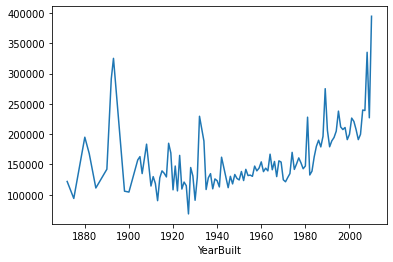

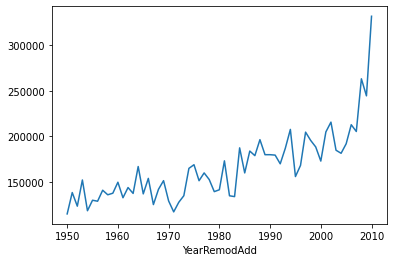

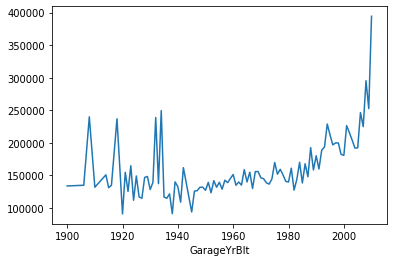

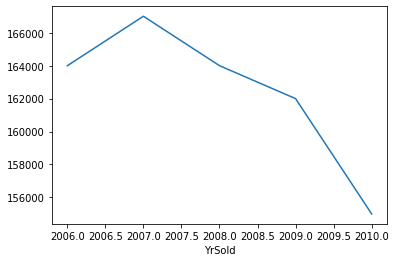

In [49]:
for i in year_features: 
    df.groupby(i)['SalePrice'].median().plot()
    plt.show()

<br/>
<br/>

### 5.1.2 Descrete Features

In [10]:
# For choosing the descrete features, we set the threshold value to 30
# What does it mean? We have choosen only those features which have the number of unique values less than 30.
# And also which are not in the year_features.
descrete_features = [i for i in numerical_features if len(df[i].unique()) < 30 and i not in year_features]

print('Number of descrete features : {}\n'.format(len(descrete_features)))

descrete_features

Number of descrete features : 17



['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

<br/>

### Relationship of the descrete features with SalePrice

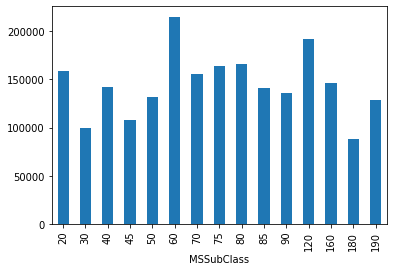

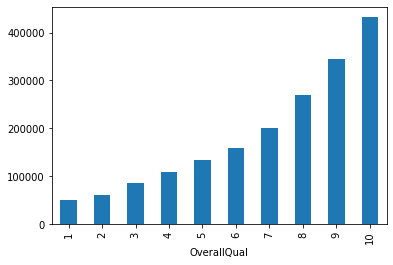

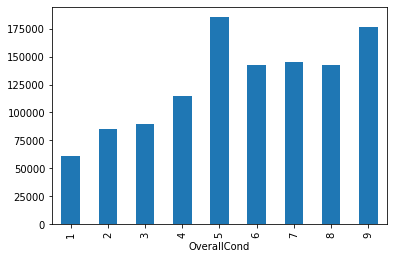

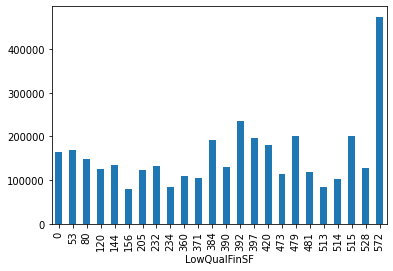

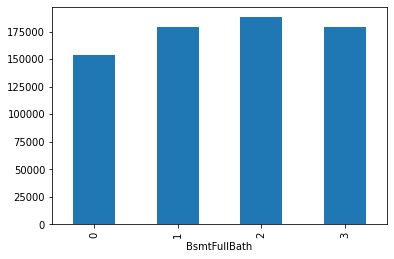

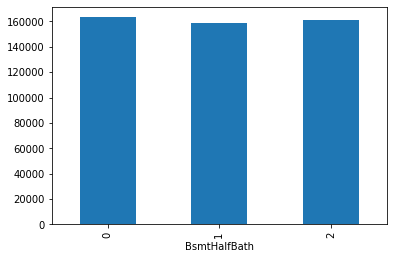

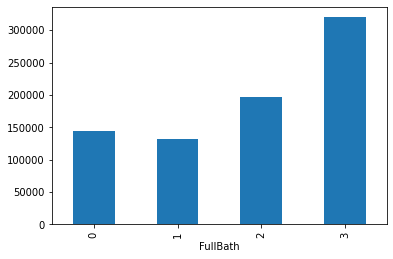

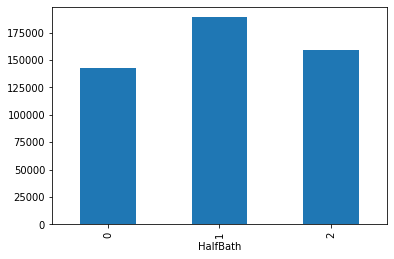

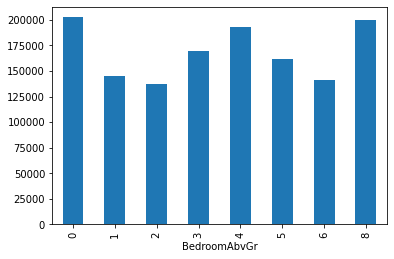

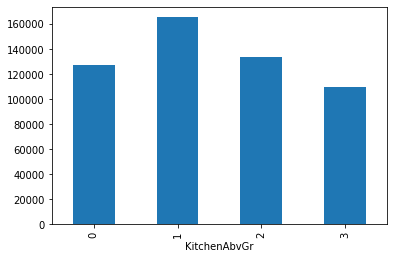

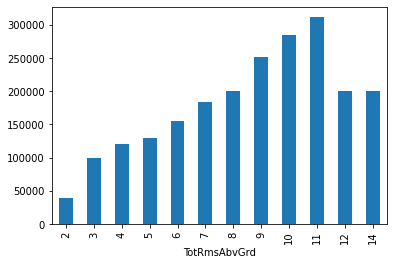

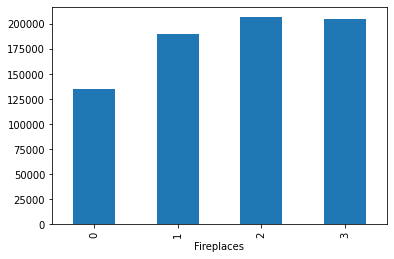

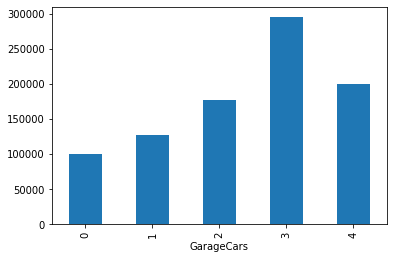

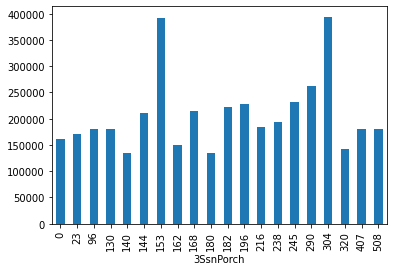

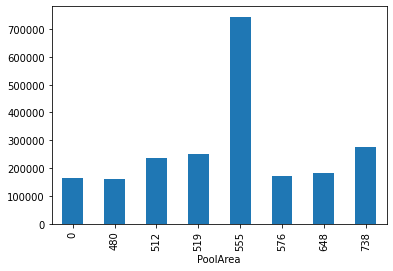

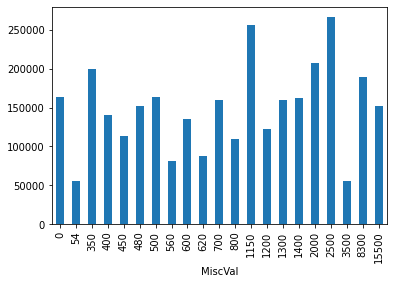

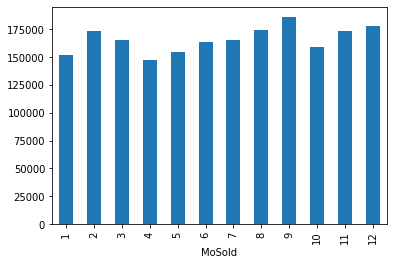

In [60]:
for i in descrete_features:
    df.groupby(i)['SalePrice'].median().plot.bar()
    plt
    plt.show()

<br/>
<br/>

## 5.1.2. Continuous Features 

In [17]:
# Numerical_features which aren't in descrete_features, year_features and Id column, are listed as Continuous Features
continuous_features = [i for i in numerical_features if i not in descrete_features+year_features+['Id']]

print('Number of continuous features : {}\n'.format(len(continuous_features)))

continuous_features

Number of continuous features : 16



['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

<br/>
<br/>

### Distribution of the continuous features

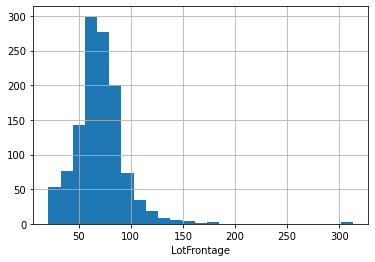

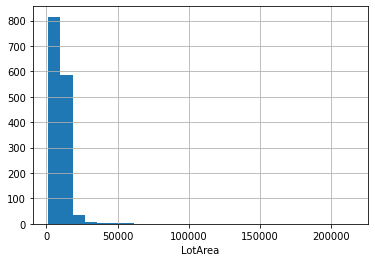

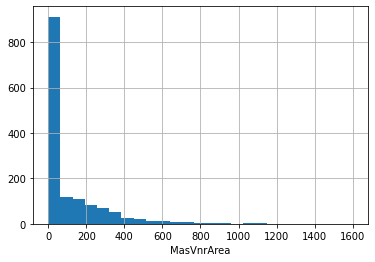

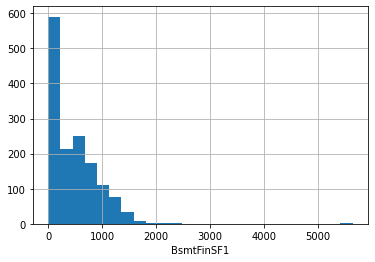

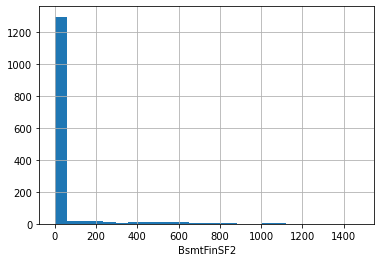

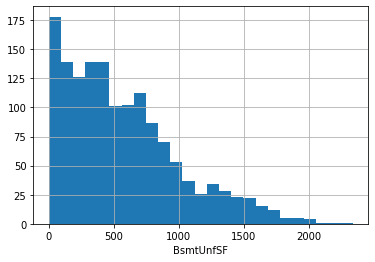

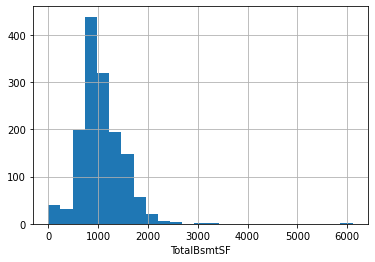

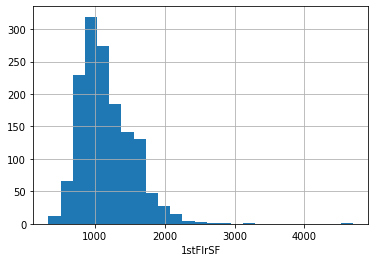

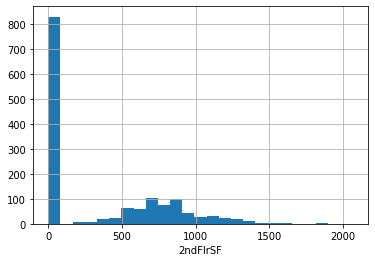

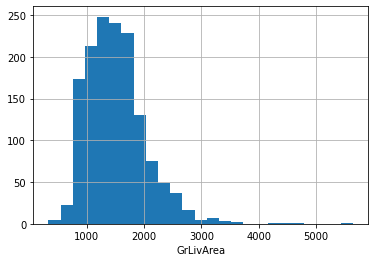

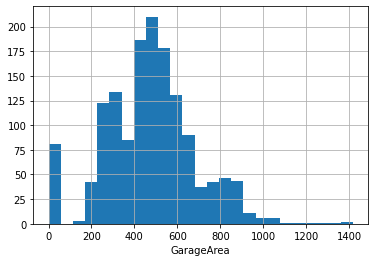

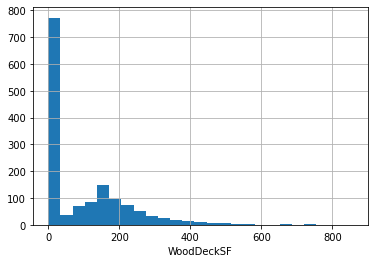

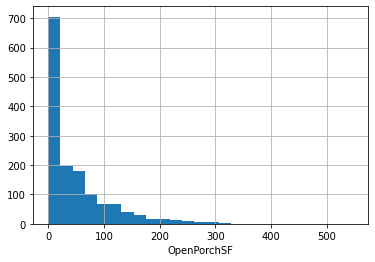

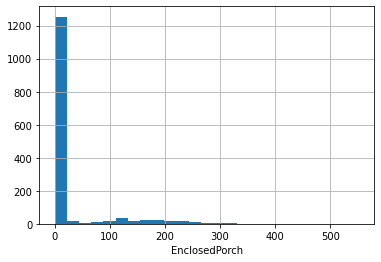

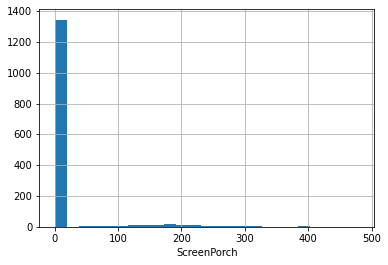

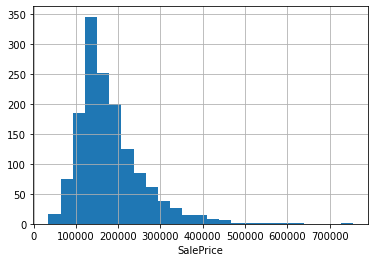

In [68]:
for i in continuous_features:
    df[i].hist(bins= 25)
    plt.xlabel(i)
    plt.show()

**Note:**  
From the Histogram plotted above, we are seeing that the distribution aren't normal or Gaussian distribution. That's why now we will change these features into **logarithmic scale**.
<br/>
<br/>

### Converted the continous_features in logarithmic scale

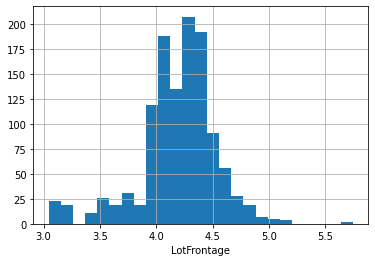

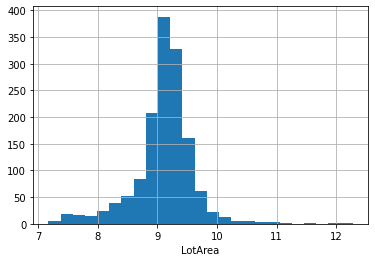

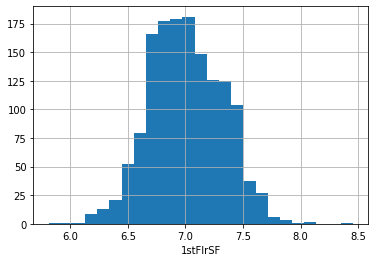

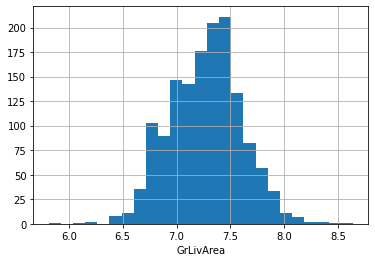

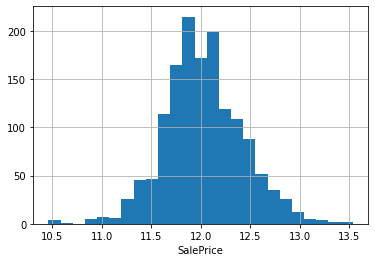

In [70]:
for feature in continuous_features:
    if 0 in df[feature].unique():          # We will skip the features which have any unique values of 0
        pass                               # Because the value of log0 is infinite
    else:
        df[feature] = np.log(df[feature])  # Converted into logarithmic scale using numpy
        df[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.show()

**Note:**  
Before converting them into logarithmic scale, make a copy of your dataset. Otherwise your main dataset will be converted and you may face problems latter on.
<br/>
<br/>

### Now let's see the relationship of continous features with SalePrice

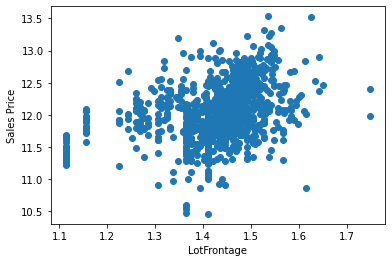

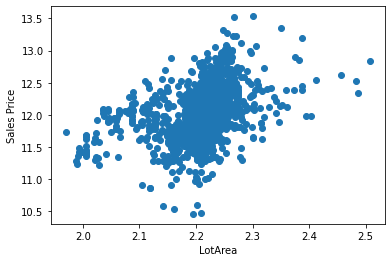

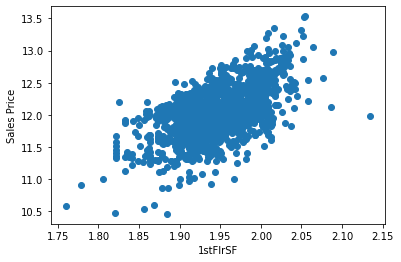

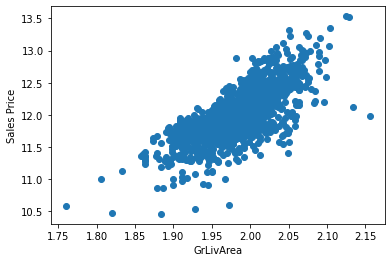

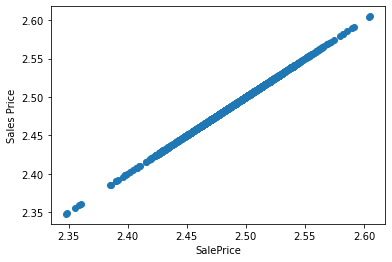

In [73]:
for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        plt.scatter(df[feature], df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

<br/>
<br/>

##  5.2 Categorical Features

In [14]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('\nNumber of categorical features : {}'.format(len(categorical_features)))

categorical_features


Number of categorical features : 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<br/>

### Let's see the unique values of each and every Categorical Features

In [82]:
for i in categorical_features:
    print('Feature : {}\nUnique values : {}\nNumber of unique values : {}\n'.format(i, df[i].unique(), len(df[i].unique())))

Feature : MSZoning
Unique values : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Number of unique values : 5

Feature : Street
Unique values : ['Pave' 'Grvl']
Number of unique values : 2

Feature : Alley
Unique values : [nan 'Grvl' 'Pave']
Number of unique values : 3

Feature : LotShape
Unique values : ['Reg' 'IR1' 'IR2' 'IR3']
Number of unique values : 4

Feature : LandContour
Unique values : ['Lvl' 'Bnk' 'Low' 'HLS']
Number of unique values : 4

Feature : Utilities
Unique values : ['AllPub' 'NoSeWa']
Number of unique values : 2

Feature : LotConfig
Unique values : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Number of unique values : 5

Feature : LandSlope
Unique values : ['Gtl' 'Mod' 'Sev']
Number of unique values : 3

Feature : Neighborhood
Unique values : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


<br/>

### Relationship of categorical features with SalePrice using Bar plot

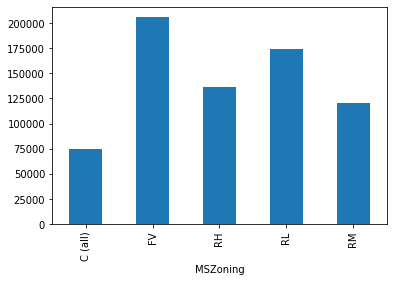

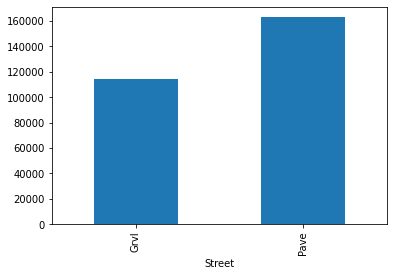

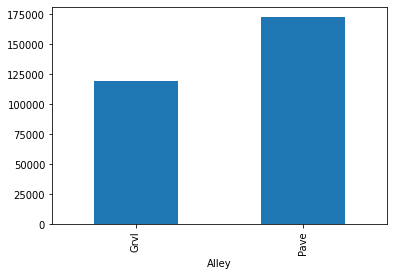

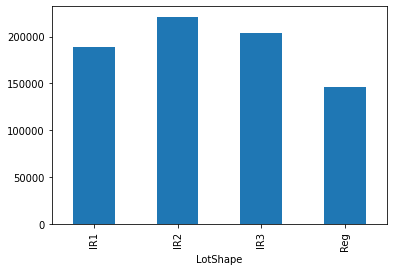

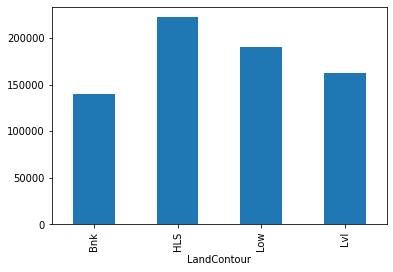

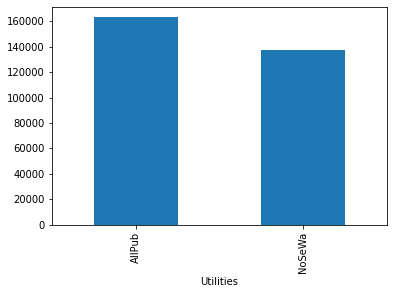

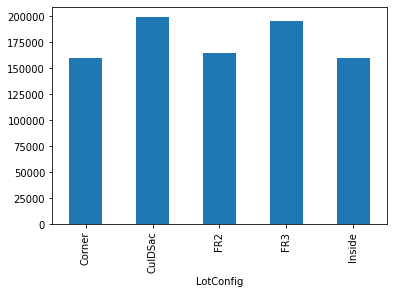

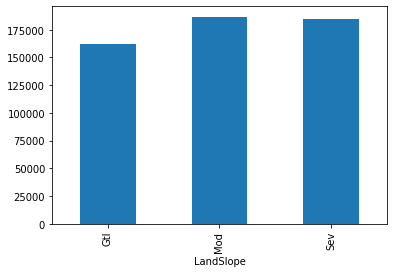

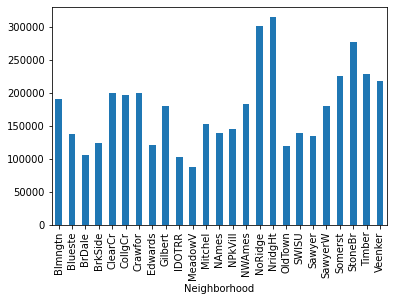

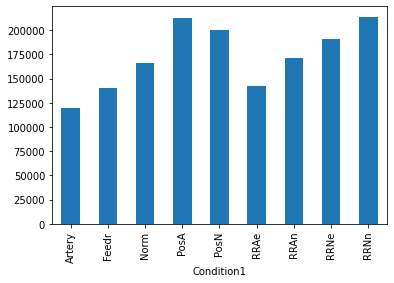

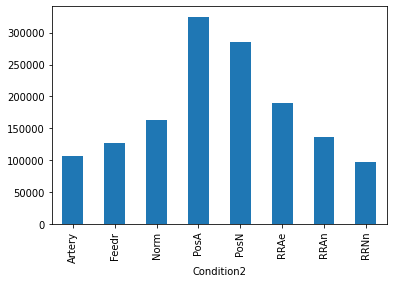

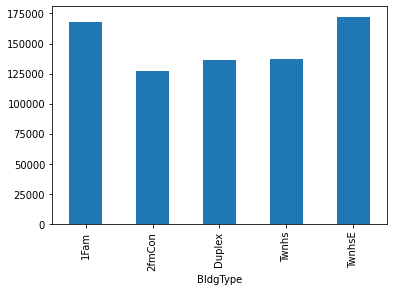

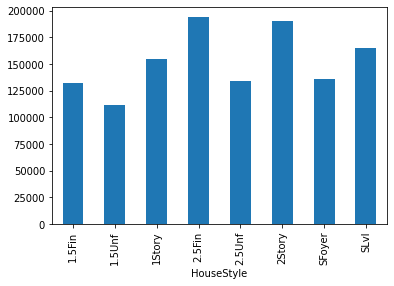

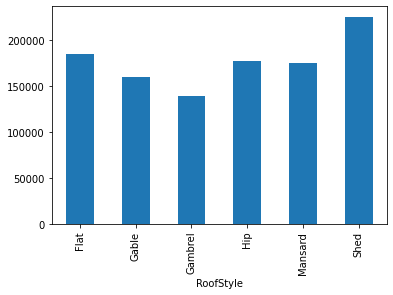

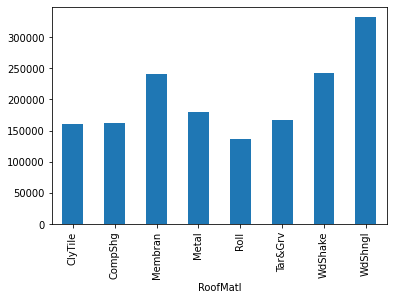

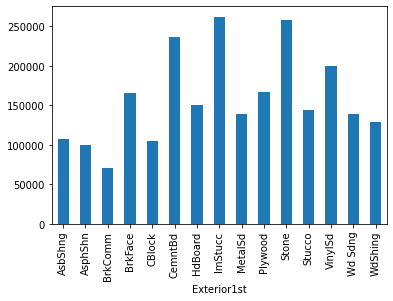

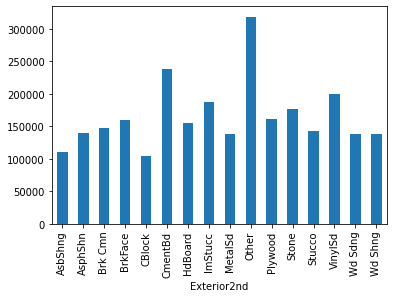

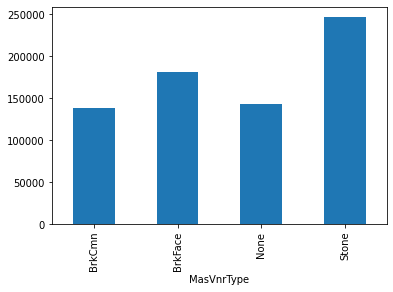

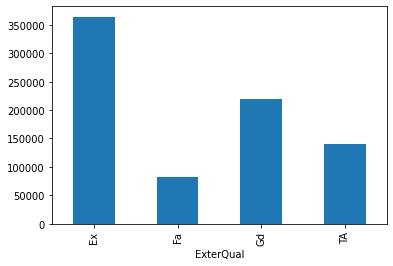

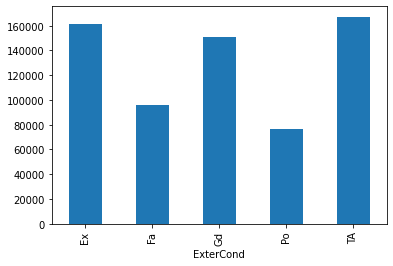

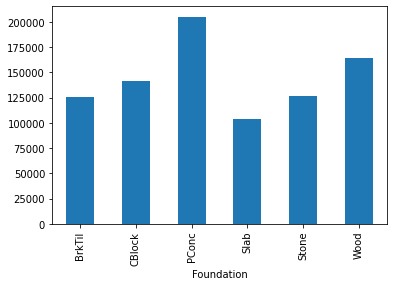

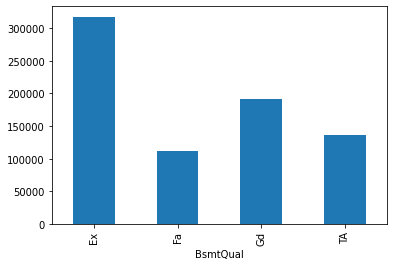

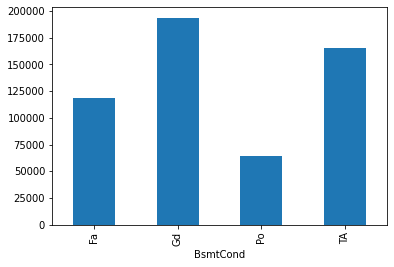

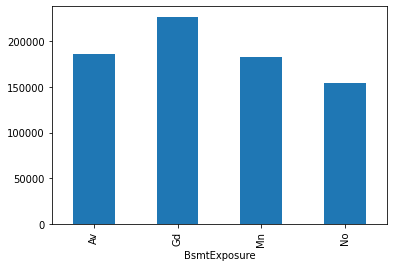

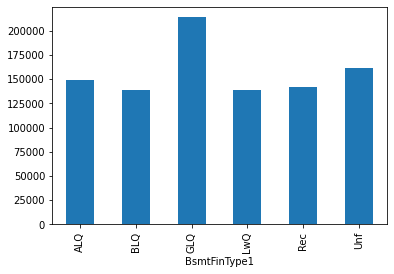

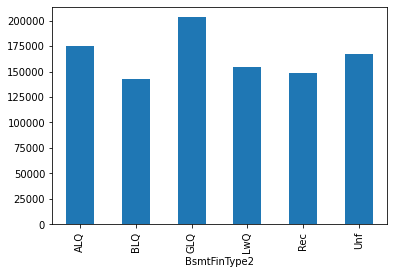

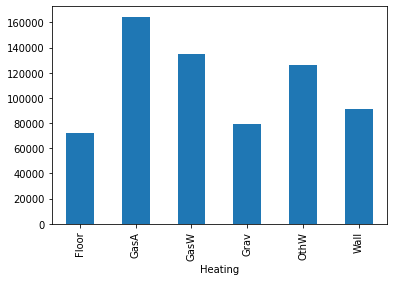

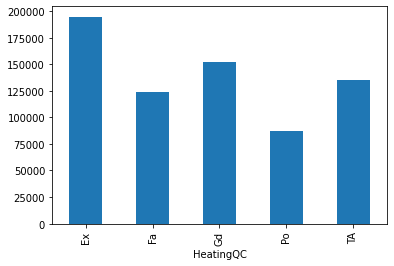

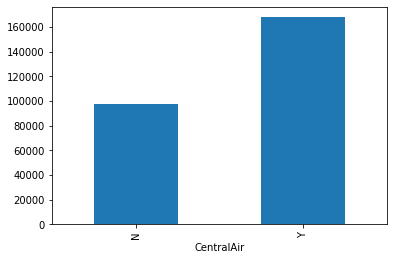

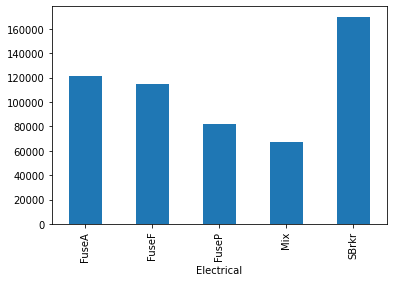

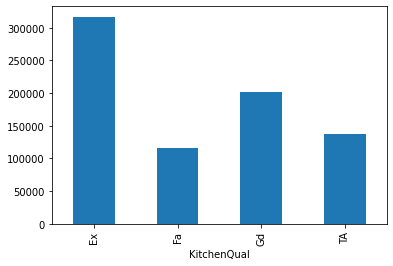

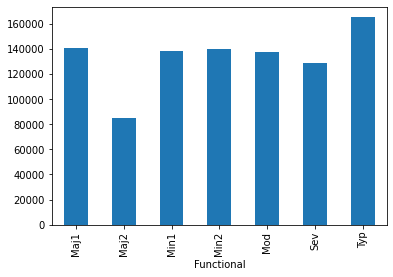

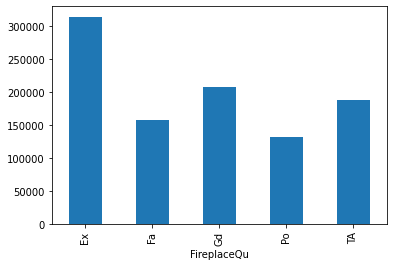

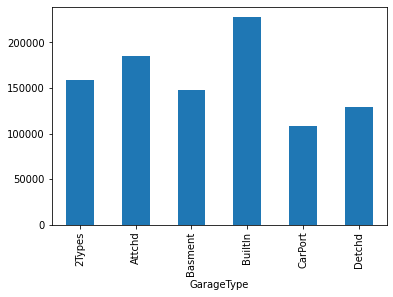

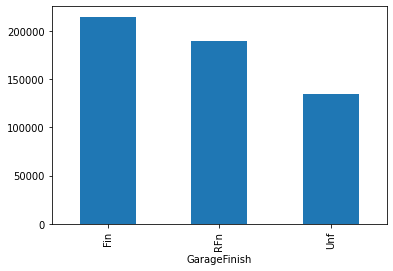

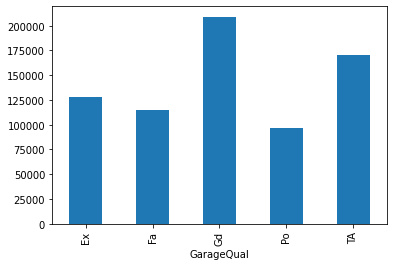

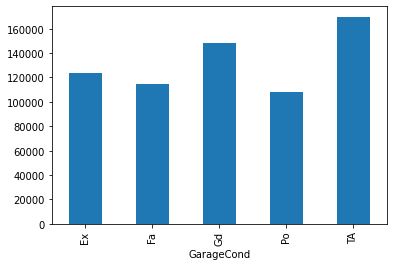

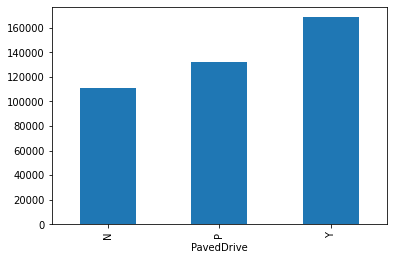

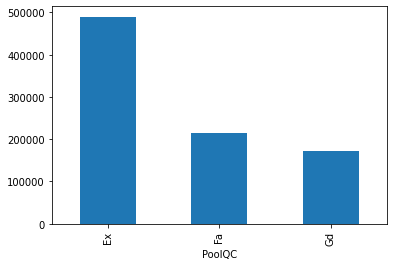

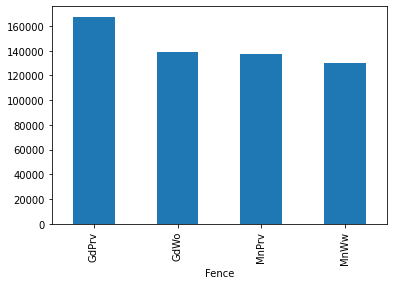

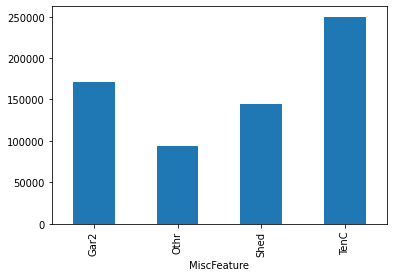

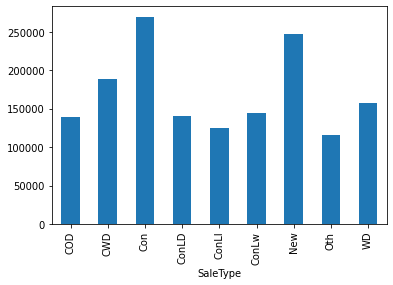

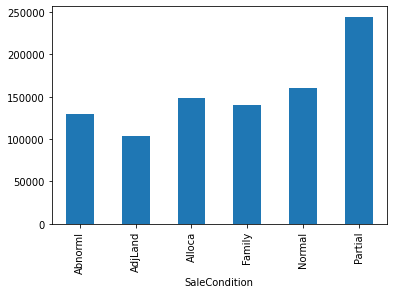

In [15]:
for i in categorical_features:
    df.groupby(i)['SalePrice'].median().plot.bar()
    plt.show()

<br/>
<br/>

## 6. Outliers

To see the outlies, we have used boxplot here. The bottom arm of the boxplot indicates 1st quartile and the upper arm indicates the 3rd one.  
Points outside of the cape are the outliers here.

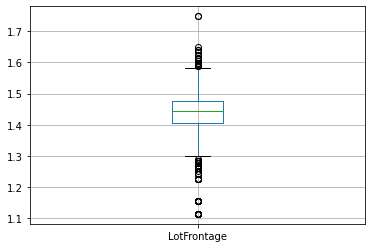

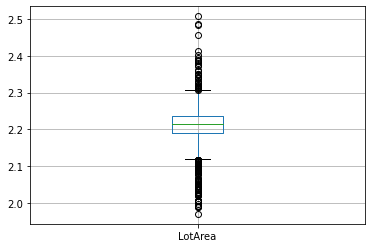

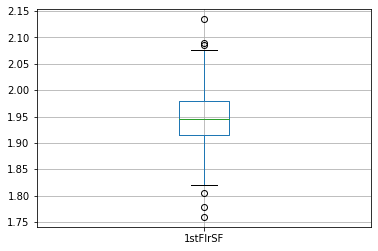

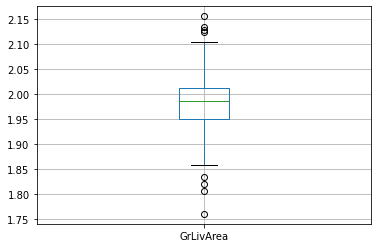

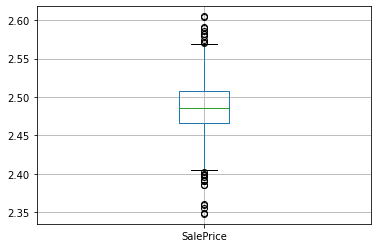

In [20]:
for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column = feature)
        plt.show()

**Note:**  
From the boxplot, we are seeing that there's a lot of outliers throughout the whole dataset. We will have to manage them all in Featurte Engineering.

<br/>
<br/>
<br/>

**Gratitude:** Krish Naik  
**Image source:** clipart-library.com and towardsdatascience.com

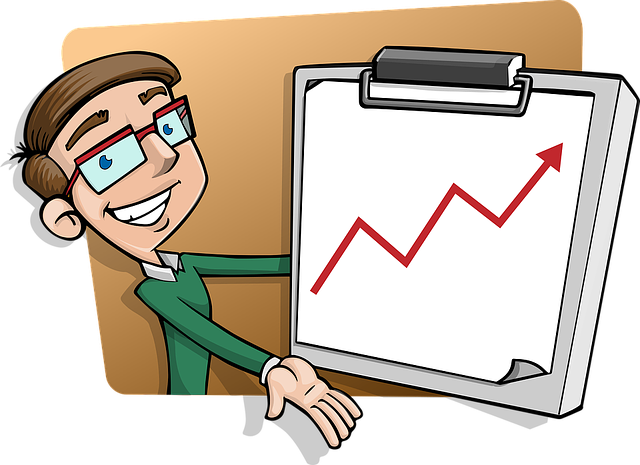